In [1]:
import imaging_behavior_functions
import odor_behavioral_analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io
import os
import mat73
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from scipy.stats import iqr
from PIL import Image
import cv2
from IPython.display import display, clear_output
import time
import seaborn as sns
from scipy.stats import iqr
from scipy.ndimage import gaussian_filter1d
import glob
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import tensorflow as tf

c:\Users\wilson\anaconda3\envs\2p_process\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [2]:
base_path = "C:/Users/wilson/OneDrive - Harvard University/Thesis - Wilson lab/2P imaging/preprocessed data/qualified_sessions/one_trial_sessions/"
example_path_data = base_path+"20230814-1_EPGhDeltaB_syntGCAMP7f_odor_apple_patchy/data/"
example_path_results = base_path+"20230814-1_EPGhDeltaB_syntGCAMP7f_odor_apple_patchy/results/"
trial_num = 1
odor_threshold = 5
time_interval_threshold = 16  # Assuming time is in seconds or an equivalent unit
k = 8
window_size = 30

is_mat73, roi_df, dff_raw, kinematics_raw, preprocessed_vars_ds, preprocessed_vars_odor = imaging_behavior_functions.load_intermediate_mat(example_path_data,trial_num)
behav_df = imaging_behavior_functions.make_df_behavior(dff_raw, preprocessed_vars_ds, preprocessed_vars_odor,trial_num,ball_d = 9)
xPos, yPos = imaging_behavior_functions.reconstruct_path(behav_df, ball_d = 9)
roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence = imaging_behavior_functions.get_roi_seq(roi_df)
dff_all_rois, dff_time = imaging_behavior_functions.load_dff_raw(is_mat73, dff_raw)
neural_df = imaging_behavior_functions.make_df_neural(dff_all_rois, dff_time, roi_names, hdeltab_index, epg_index, hdeltab_sequence, epg_sequence)
behav_df, padded_result_df, smoothed_df = odor_behavioral_analysis.analysis_dfs(behav_df, time_interval_threshold, k, window_size)
combined_df = imaging_behavior_functions.combine_df(behav_df, neural_df)
smoothed_df["translationalV_smoothed"] = np.sqrt(smoothed_df["fwV_smoothed"]**2+smoothed_df["sideV_smoothed"]**2)

c:\Users\wilson\anaconda3\envs\2p_process\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [3]:
smoothed_df

,time,fwV,sideV,yawV,heading,abssideV,absyawV,net_motion,net_motion_state,heading_adj,...,yPos,cluster_label_temporal,soft_cluster_label_temporal,cluster_label_spatial,fwV_smoothed,sideV_smoothed,yawV_smoothed,heading_smoothed,straightness_smoothed,translationalV_smoothed
0,0.000000,0.000000,0.000000,0.000000,0.385674,0.000000,0.000000,0.000000,0,0.385674,...,0.000000,0,0,0,3.072275,-7.567584,1.376365,0.479128,0.761829,8.167447
1,0.291806,6.425764,-16.468804,4.016872,0.509846,16.468804,4.016872,26.911439,1,0.509846,...,1.628857,0,0,0,3.208180,-7.953026,1.344198,0.500652,0.754700,8.575723
2,0.583611,4.171223,-6.055598,-2.076583,0.502235,6.055598,2.076583,12.303404,1,0.502235,...,2.751727,0,0,0,3.353178,-8.263929,1.157035,0.537205,0.755254,8.918314
3,0.875417,2.407029,-14.872266,8.301797,0.638375,14.872266,8.301797,25.581091,1,0.638375,...,3.258702,0,0,0,3.459225,-8.034249,0.717614,0.580443,0.732105,8.747307
4,1.167222,4.021584,-1.169685,-4.926420,0.615807,1.169685,4.926420,10.117690,1,0.615807,...,4.387152,0,0,0,3.666261,-7.146349,0.090427,0.623503,0.747510,8.031922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164,1798.689210,14.187531,-5.823839,-2.573166,5.321017,5.823839,2.573166,22.584536,1,-95.209948,...,443.268740,0,0,6,14.515653,-7.755664,-1.762775,5.376011,NaN,16.457658
6165,1798.981015,14.452897,-10.719389,-0.305870,5.203520,10.719389,0.305870,25.478156,1,-95.327445,...,443.521638,0,0,6,13.310443,-9.264425,-1.193742,5.282641,NaN,16.217196
6166,1799.272821,16.318690,-6.766734,-3.085316,5.133504,6.766734,3.085316,26.170740,1,-95.397461,...,443.576894,0,0,6,11.714005,-10.401275,-0.466328,5.223468,NaN,15.665390
6167,1799.564626,4.046410,-30.038337,1.817984,4.964697,30.038337,1.817984,35.902731,1,-95.566268,...,443.002146,0,0,6,10.156611,-10.901462,0.257126,5.197676,NaN,14.899618


In [4]:
selected_df = neural_df.filter(like='EPG')
selected_df

,EPG_0,EPG_1,EPG_2,EPG_3,EPG_4,EPG_5,EPG_6,EPG_7,EPG_8,EPG_9,EPG_10,EPG_11,EPG_12,EPG_13,EPG_14,EPG_15,EPG_16,EPG_17,EPG_18,EPG_19
0,1.426788,1.201204,2.092364,2.625277,1.195126,0.425699,-0.003360,-0.008666,-0.096737,0.090464,1.258267,2.278850,1.801920,1.051749,0.412592,0.101984,0.066552,-0.009868,0.055826,0.403636
1,1.286149,1.161376,2.120126,2.900767,1.696973,0.716046,0.055713,-0.038968,-0.103121,-0.050814,1.201104,2.152521,1.819975,1.111785,0.585159,0.088785,0.037270,-0.001264,0.049107,0.413241
2,1.149003,1.056891,2.060726,3.038910,2.150597,0.976142,0.137281,-0.074804,-0.154623,-0.155109,1.084706,2.029162,1.894927,1.233283,0.812064,0.079659,0.014734,0.004908,0.031883,0.523891
3,0.939120,0.992593,1.999556,3.058133,2.334015,1.136960,0.194458,-0.119536,-0.198017,-0.205920,0.959434,1.957260,1.934017,1.359277,1.027979,0.089319,0.025843,0.015863,0.024934,0.587175
4,0.687230,0.937843,1.963905,3.030830,2.369906,1.232999,0.242235,-0.118721,-0.210081,-0.205543,0.866254,1.924025,1.933321,1.462505,1.245046,0.115831,0.060660,0.017599,0.043324,0.596482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164,-0.123915,-0.087014,0.053991,1.076849,2.114904,2.620444,2.638996,1.714060,0.165499,-0.061913,-0.000627,0.243012,0.563992,1.120891,2.585484,2.902346,2.196957,0.794669,0.107885,0.262692
6165,-0.159373,-0.123651,0.045902,1.057257,2.067859,2.554269,2.456603,1.528996,0.165247,-0.056405,0.013024,0.161047,0.512404,1.048375,2.408114,2.669490,2.043317,0.698882,0.103187,0.286132
6166,-0.189117,-0.110480,0.074347,1.094834,2.091214,2.574207,2.509415,1.551318,0.176553,-0.013095,-0.016489,0.167057,0.529441,1.007609,2.315763,2.604335,2.113503,0.761849,0.099611,0.322186
6167,-0.174522,-0.039816,0.127729,1.195944,2.184982,2.607542,2.690361,1.762657,0.233168,-0.012718,-0.058638,0.219561,0.518921,0.972114,2.175265,2.615830,2.181024,0.912892,0.092889,0.258340


<Axes: >

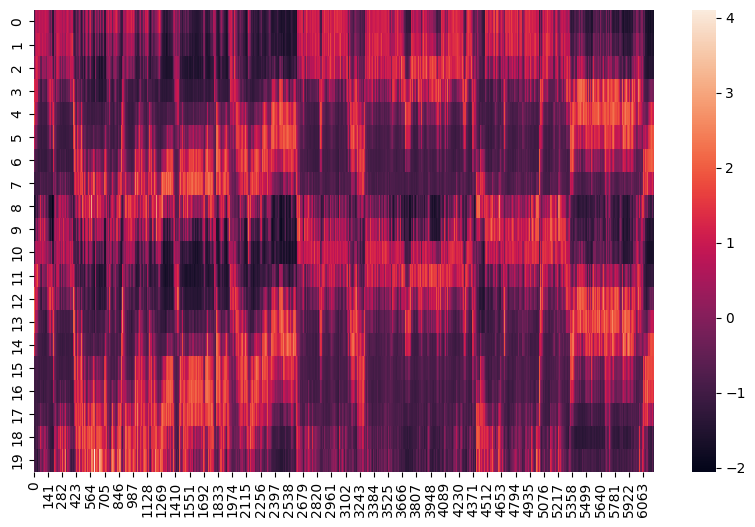

In [8]:
scaler = StandardScaler()
roi_mtx = scaler.fit_transform(selected_df)
plt.figure(figsize=(10, 6))
sns.heatmap(np.transpose(roi_mtx))

In [12]:
def calculate_pva(activity_matrix):
    num_neurons, time_steps = activity_matrix.shape
    directions = np.linspace(0, 2*np.pi, num_neurons//2, endpoint=False)
    
    # Repeat directions for both halves of the neuron population
    directions = np.tile(directions, 2)
    
    # Calculate vector components for each neuron's activity
    x_components = np.cos(directions)[:, np.newaxis] * activity_matrix
    y_components = np.sin(directions)[:, np.newaxis] * activity_matrix
    
    # Sum components across neurons for each time step
    sum_x = np.sum(x_components, axis=0)
    sum_y = np.sum(y_components, axis=0)
    
    # Calculate PVA for each time step
    pva_phase = np.arctan2(sum_y, sum_x)  # Phase in radians
    pva_amplitude = np.sqrt(sum_x**2 + sum_y**2)  # Magnitude of the vector
    
    # Compute overall PVA estimate (mean across time steps)
    #mean_phase = np.mean(pva_phase)
    #mean_amplitude = np.mean(pva_amplitude)
    
    return pva_phase, pva_amplitude


pva_phase, pva_amplitude = calculate_pva(np.transpose(roi_mtx))
#plt.plot(mean_phase)
#print(f"Mean PVA Phase: {mean_phase} radians")
#print(f"Mean PVA Amplitude: {mean_amplitude}")


In [16]:
mean_epg = np.transpose(np.mean(roi_mtx, axis=1))


## PCA

In [5]:
def perform_pca(selected_df, n_components=3):
    """
    Perform PCA on the given dataframe.

    Args:
    - data (pd.DataFrame): The dataframe containing neuron activity data.
    - n_components (int): The number of principal components to compute.

    Returns:
    - pca (PCA object): The PCA object after fitting the data.
    - transformed_data (np.array): Data transformed into principal components.
    - explained_variance_ratio (np.array): The amount of variance explained by each of the selected components.
    """
    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(selected_df)

    # Perform PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_

    return pca, transformed_data, explained_variance_ratio
pca, transformed_data, explained_variance_ratio = perform_pca(selected_df,n_components=3)

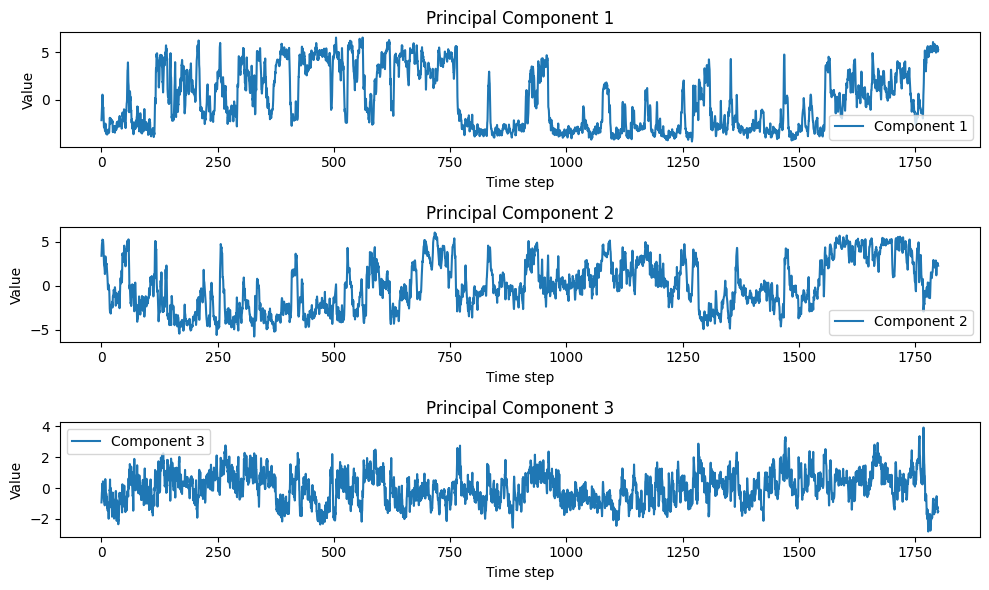

In [6]:
# visualze top PCstime_steps = range(transformed_data.shape[0])

n_components = 3
time_steps = range(transformed_data.shape[0])

# Create a figure with subplots
fig, axes = plt.subplots(n_components, 1, figsize=(10, 2*n_components))

for i in range(n_components):
    ax = axes[i]
    ax.plot(neural_df.time, transformed_data[:, i], label=f'Component {i+1}')
    ax.set_title(f'Principal Component {i+1}')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [13]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
phase = np.array(pva_phase)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=phase[::4],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Phase'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [14]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
amplitude = np.array(pva_amplitude)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=amplitude[::4],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Amplitude'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [18]:
# Extract the first three PCs
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
baseline = np.array(mean_epg)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=4,
        color=baseline[::4],  # Set color to time steps
        colorscale='Viridis',  # Choose a color scale
        colorbar=dict(title='Population Mean'),
        opacity=0.5
    )
)])

'''for idx in big_drop_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='red', width=2)))

for idx in big_increase_indices:
    fig.add_trace(go.Scatter3d(x=pc1[idx:idx+2], y=pc2[idx:idx+2], z=pc3[idx:idx+2],
                               mode='lines',
                               line=dict(color='black', width=2)))'''    
# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [19]:
# Extract the first three PCs
pc1 = gaussian_filter1d(transformed_data[:, 0], sigma=10)
pc2 = gaussian_filter1d(transformed_data[:, 1],sigma=10)
pc3 = gaussian_filter1d(transformed_data[:, 2],sigma=10)

# Time steps for coloring
#lower_threshold = np.percentile(smoothed_df.fwV_smoothed, 5)
#upper_threshold = np.percentile(smoothed_df.fwV_smoothed, 95)
#color_var = np.abs(np.clip(smoothed_df.fwV_smoothed,lower_threshold, upper_threshold))
color_var = neural_df.time

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1,
    y=pc2,
    z=pc3,
    mode='markers',
    marker=dict(size=5, color=color_var, colorscale='Viridis')
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


In [65]:
padded_result_df.head(1)

,Curvature_Mean,Curvature_Std,Tight_Turns,Moderate_Turns,Wide_Turns,Heading_Variance,Mean_fwV_sideV_Ratio,Yaw_Velocity_Mean,Yaw_Velocity_Std
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


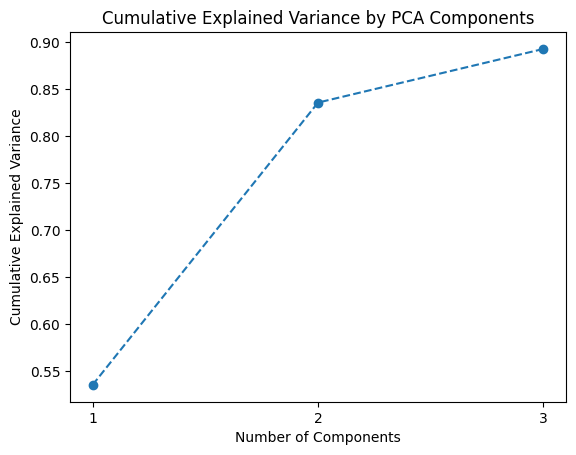

In [77]:
plt.plot(range(1, 4), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xticks(range(1, 4))
plt.show()

## Attempt 1: clustering (single behavioral var)

In [164]:
def perform_clustering(transformed_data, target_df, behavioral_variable, n_clusters=3):
    """
    Perform K-means clustering on combined neural PCs and a behavioral time series.

    Parameters:
    - neural_pcs: NumPy array or pandas DataFrame with the neural principal components.
    - behav_df: pandas DataFrame containing the behavioral time series.
    - behavioral_variable: string, the column name in behav_df for the behavioral time series.
    - n_clusters: int, the number of clusters to use in K-means.

    Returns:
    - Updates behav_df with a new column 'cluster_labels' containing the cluster labels.
    """
    
    # Ensure the behavioral variable is in the correct format and align lengths
    behavior_series = target_df[behavioral_variable].values.reshape(-1, 1)
    
    # Check if dimensions match
    if len(transformed_data) != len(behavior_series):
        raise ValueError("The lengths of neural PCs and behavioral data do not match.")
    
    # Combine neural PCs and behavioral variable
    combined_data = np.hstack((transformed_data, behavior_series))
    
    # Standardize the combined data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(combined_data)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(standardized_data)
    
    # Save cluster labels in behav_df
    target_df[behavioral_variable+'_labels'] = kmeans.labels_
    
    return target_df

# Example usage
# Assuming `neural_pcs` is your PCA components as a NumPy array or DataFrame
# and `behav_df` is your DataFrame with a column 'behavior_var' for the behavioral time series
perform_clustering(transformed_data, neural_df, 'MBON21R', n_clusters=7)

c:\Users\wilson\anaconda3\envs\2p_process\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,time,MBON21L,MBON21R,hDeltaB_0,hDeltaB_1,hDeltaB_2,hDeltaB_3,hDeltaB_4,hDeltaB_5,hDeltaB_6,...,hDeltaB_19,hDeltaB_20,hDeltaB_21,hDeltaB_22,hDeltaB_23,hDeltaB_24,hDeltaB_25,hDeltaB_26,hDeltaB_27,MBON21R_labels
0,0.000000,0.222773,0.264867,1.241962,0.383523,0.358444,0.097757,0.011519,0.277770,0.061169,...,2.185271,1.999191,2.162483,1.916930,1.971367,1.724920,1.422568,1.198348,1.322129,1
1,0.240513,0.209713,0.237666,1.122885,0.373910,0.261601,0.186200,0.079669,0.205932,0.085467,...,2.245278,2.006683,2.076988,1.878382,2.054740,1.769468,1.327635,1.199988,1.461048,1
2,0.481026,0.161754,0.212745,1.138844,0.295217,0.133648,0.338941,0.132484,0.163215,0.189639,...,2.262364,2.080175,2.052068,1.858321,2.050991,1.830000,1.274174,1.266786,1.564603,1
3,0.721539,0.086226,0.170872,1.136710,0.232473,0.008637,0.368918,0.121838,0.228631,0.317409,...,2.287551,2.155690,2.116092,1.876195,1.937832,1.814542,1.178010,1.355249,1.511653,1
4,0.962052,0.021611,0.116444,0.784412,0.284925,-0.013781,0.299948,0.062412,0.358765,0.385596,...,2.245671,2.199512,2.166246,1.901164,1.879810,1.712413,1.057092,1.345140,1.334321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,1799.036986,0.495776,0.447953,0.220035,-0.130434,0.015037,-0.042719,-0.123742,-0.077967,0.034825,...,2.692949,2.204068,1.894932,1.306142,1.125682,0.694187,0.191132,0.156214,0.164683,6
7481,1799.277499,0.477877,0.464794,0.021527,-0.090348,-0.056911,-0.082641,-0.201801,-0.158782,0.034147,...,2.674942,2.417434,2.100247,1.446980,1.464223,0.892807,0.474159,0.244738,0.307505,6
7482,1799.518012,0.477426,0.469343,-0.275158,-0.050738,-0.134345,-0.031096,-0.246961,-0.211673,-0.003561,...,2.660348,2.594776,2.300975,1.788475,1.732115,1.079645,0.681985,0.223644,0.445096,6
7483,1799.758525,0.468498,0.453946,-0.411082,-0.063065,-0.065458,0.032444,-0.249648,-0.194095,-0.061058,...,2.721088,2.683954,2.458006,2.080824,1.906719,1.199272,0.745784,0.225406,0.542416,1


In [165]:
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]
pc3 = transformed_data[:, 2]

# Time steps for coloring
#lower_threshold = np.percentile(smoothed_df.fwV_smoothed, 5)
#upper_threshold = np.percentile(smoothed_df.fwV_smoothed, 95)
#color_var = np.abs(np.clip(smoothed_df.fwV_smoothed,lower_threshold, upper_threshold))
color_var = neural_df.MBON21R_labels

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=pc1[::4],
    y=pc2[::4],
    z=pc3[::4],
    mode='markers',
    marker=dict(
        size=5,
        color=color_var[::4],  # Set color to time steps
        colorscale='hot',  # Choose a color scale
        colorbar=dict(title='Cluster Label'),
        opacity=0.8
    )
)])

# Set the layout of the figure
fig.update_layout(
    title='Trajectory of the First 3 Principal Components in State Space',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the figure
fig.show()


## Behavior

In [145]:
imaging_behavior_functions.plot_fly_traj(behav_df.xPos,behav_df.yPos,behav_df,'odor',example_path_results,1)